In [1]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
from pathlib import Path

In [7]:
BASE_PATH = Path("../../")

In [2]:
def load_model(model_path):
    mesh = trimesh.load(model_path)
    return mesh

def load_keypoints(keypoints_path):
    with open(keypoints_path, 'r') as f:
        data = json.load(f)
    keypoints = np.array(data['keypoints_3D'])
    return keypoints

In [3]:
LINEMOD_CLASSES = {
    1: "ape", 2: "benchvise", 3: "bowl", 4: "camera", 5: "can",
    6: "cat", 7: "cup", 8: "driller", 9: "duck", 10: "eggbox",
    11: "glue", 12: "holepuncher", 13: "iron", 14: "lamp", 15: "phone"
}

In [12]:
def visualize_multiple_objects(obj_ids):
    fig = plt.figure(figsize=(20, 8))

    for idx, obj_id in enumerate(obj_ids):
        model_path = BASE_PATH / f"datasets/lm/models/obj_{obj_id:06d}.ply"  # Or .obj / .stl
        keypoints_path = BASE_PATH / f"data/keypoints3d/{obj_id:06d}.json"
    
        mesh = load_model(model_path)
        keypoints = load_keypoints(keypoints_path)

        # Prepare keypoints in mm
        keypoints_mm = keypoints * 1000

        # Create subplot
        ax = fig.add_subplot(2, 4, idx + 1, projection='3d')

        # Plot mesh
        vertices = mesh.vertices
        faces = mesh.faces
        ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, color=(0.5, 0.5, 0.5, 0.3))

        # Plot keypoints
        ax.scatter(keypoints_mm[:, 0], keypoints_mm[:, 1], keypoints_mm[:, 2], c='r', s=30, label='3D Keypoints')
        text_offset = 1
        for kp_idx, (x, y, z) in enumerate(keypoints_mm):
            ax.text(x + text_offset, y + text_offset, z + text_offset, str(kp_idx), color='blue', fontsize=6)

        ax.set_title(LINEMOD_CLASSES[obj_id])
        ax.set_axis_off()

        # Set consistent aspect ratio
        max_range = (vertices.max(axis=0) - vertices.min(axis=0)).max() / 2
        mid = vertices.mean(axis=0)
        ax.set_xlim(mid[0] - max_range, mid[0] + max_range)
        ax.set_ylim(mid[1] - max_range, mid[1] + max_range)
        ax.set_zlim(mid[2] - max_range, mid[2] + max_range)

    plt.tight_layout()
    plt.show()

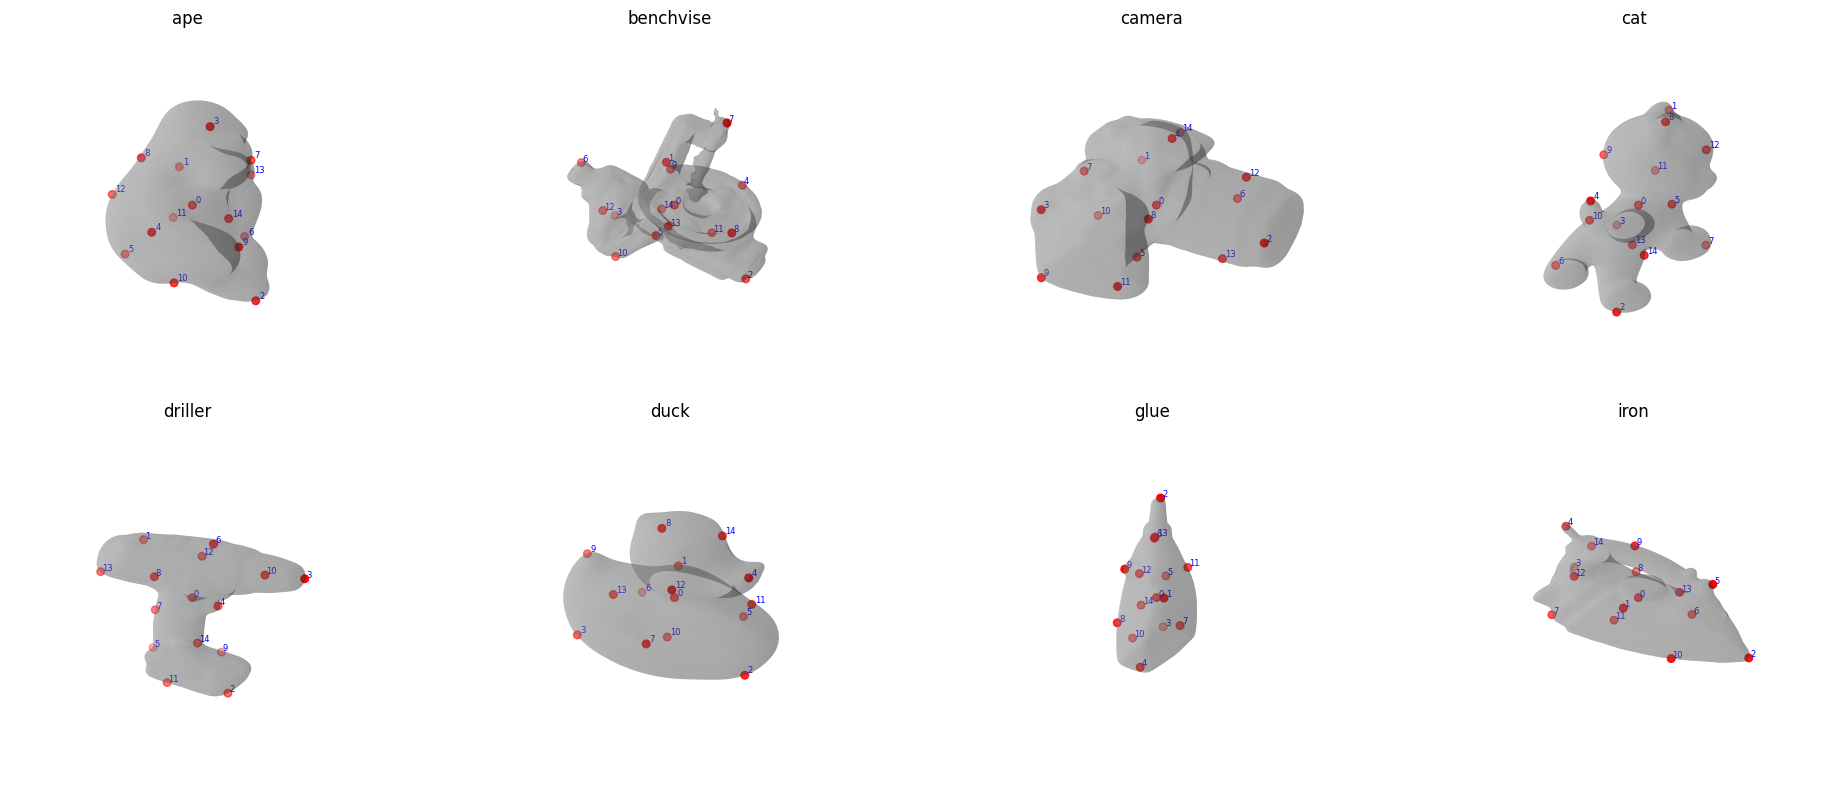

In [13]:

obj_ids = [1, 2, 4, 6, 8, 9, 11, 13]
visualize_multiple_objects(obj_ids)